In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [9]:
test_df = pd.read_csv('test_df.csv')

In [10]:
train_df = pd.read_csv('train_df.csv')

In [11]:
test_df.head()

,sample,AF1,AF2,AF7,AF8,AFZ,C1,C2,C3,C4,...,TP7,TP8,X,Y,nd,subject,alcoholic,match,err,object
0,0,-2.797,-3.448,-0.305,-4.089,-2.797,0.315,1.088,0.651,2.370,...,-8.860,-0.071,-5.544,-4.873,-4.089,co2a0000377,True,nomatch,False,False
1,1,-2.309,-3.937,1.160,-5.066,-3.286,0.804,1.088,1.628,1.882,...,-8.372,0.417,-6.032,-1.943,-0.183,co2a0000377,True,nomatch,False,False
2,2,-1.333,-3.448,2.625,-5.554,-2.797,1.292,0.600,3.092,1.882,...,-3.977,0.905,-4.079,1.475,3.723,co2a0000377,True,nomatch,False,False
3,3,-0.356,-2.472,2.136,-5.066,-1.821,0.804,0.600,3.092,1.394,...,3.347,0.905,-1.149,3.428,5.188,co2a0000377,True,nomatch,False,False
4,4,0.621,-1.495,1.160,-4.578,-0.844,0.315,0.112,2.604,0.417,...,10.183,-0.071,2.268,3.916,2.747,co2a0000377,True,nomatch,False,False


In [12]:
column_names_index = test_df.columns

    # Get column names as a list
column_names_list = test_df.columns.tolist()

print(column_names_index)
print(column_names_list)

Index(['sample', 'AF1', 'AF2', 'AF7', 'AF8', 'AFZ', 'C1', 'C2', 'C3', 'C4',
       'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPZ', 'CZ', 'F1',
       'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4',
       'FC5', 'FC6', 'FCZ', 'FP1', 'FP2', 'FPZ', 'FT7', 'FT8', 'FZ', 'O1',
       'O2', 'OZ', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PO1',
       'PO2', 'PO7', 'PO8', 'POZ', 'PZ', 'T7', 'T8', 'TP7', 'TP8', 'X', 'Y',
       'nd', 'subject', 'alcoholic', 'match', 'err', 'object'],
      dtype='object')
['sample', 'AF1', 'AF2', 'AF7', 'AF8', 'AFZ', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPZ', 'CZ', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCZ', 'FP1', 'FP2', 'FPZ', 'FT7', 'FT8', 'FZ', 'O1', 'O2', 'OZ', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PO1', 'PO2', 'PO7', 'PO8', 'POZ', 'PZ', 'T7', 'T8', 'TP7', 'TP8', 'X', 'Y', 'nd', 'subject', 'alcoholic', 'match'

In [13]:
test_df['alcoholic'].value_counts()

alcoholic
True     76800
False    76800
Name: count, dtype: int64

In [14]:
validation_subjects = ['co2a0000377', 'co2a0000364', 'co2c0000342', 'co2c0000345']
validation_df = test_df[test_df['subject'].isin(validation_subjects)]
test_df = test_df[~test_df['subject'].isin(validation_subjects)]
train_df = train_df[~train_df['subject'].isin(validation_subjects)]

In [15]:
drop_cols = ['sample', 'subject', 'match', 'err', 'object', 'X', 'Y', 'nd']
train_df_clean = train_df.drop(columns=drop_cols)
test_df_clean = test_df.drop(columns=drop_cols)
validation_df_clean = validation_df.drop(columns=drop_cols)

X_train = train_df_clean.drop('alcoholic', axis=1)
y_train = train_df_clean['alcoholic']
X_test = test_df_clean.drop('alcoholic', axis=1)
y_test = test_df_clean['alcoholic']
X_val = validation_df_clean.drop('alcoholic', axis=1)
y_val = validation_df_clean['alcoholic']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [17]:
y_pred = knn.predict(X_test_scaled)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [19]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.69
Confusion Matrix:
[[31482 29958]
 [ 8408 53032]]
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.51      0.62     61440
        True       0.64      0.86      0.73     61440

    accuracy                           0.69    122880
   macro avg       0.71      0.69      0.68    122880
weighted avg       0.71      0.69      0.68    122880



In [20]:
y_val_pred = knn.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)
print(f"\nValidation Accuracy: {val_accuracy:.2f}")
print("Validation Confusion Matrix:")
print(val_conf_matrix)
print("Validation Classification Report:")
print(val_class_report)


Validation Accuracy: 0.62
Validation Confusion Matrix:
[[ 6228  9132]
 [ 2635 12725]]
Validation Classification Report:
              precision    recall  f1-score   support

       False       0.70      0.41      0.51     15360
        True       0.58      0.83      0.68     15360

    accuracy                           0.62     30720
   macro avg       0.64      0.62      0.60     30720
weighted avg       0.64      0.62      0.60     30720



In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
validation_df_clean = validation_df.drop(columns=drop_cols)

In [23]:
X_validation = validation_df_clean.drop('alcoholic', axis=1)
y_validation = validation_df_clean['alcoholic']

In [24]:
X_validation_scaled = scaler.transform(X_validation)

In [25]:
# Combine training and validation data
X_combined = pd.concat([pd.DataFrame(X_train_scaled), pd.DataFrame(X_validation_scaled)])
y_combined = pd.concat([y_train, y_validation])

# Sample a small percentage of the data
sample_size = 0.05  # 5% of the data
X_sampled, _, y_sampled, _ = train_test_split(X_combined, y_combined, test_size=1-sample_size, random_state=42, stratify=y_combined)


In [26]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sampled)

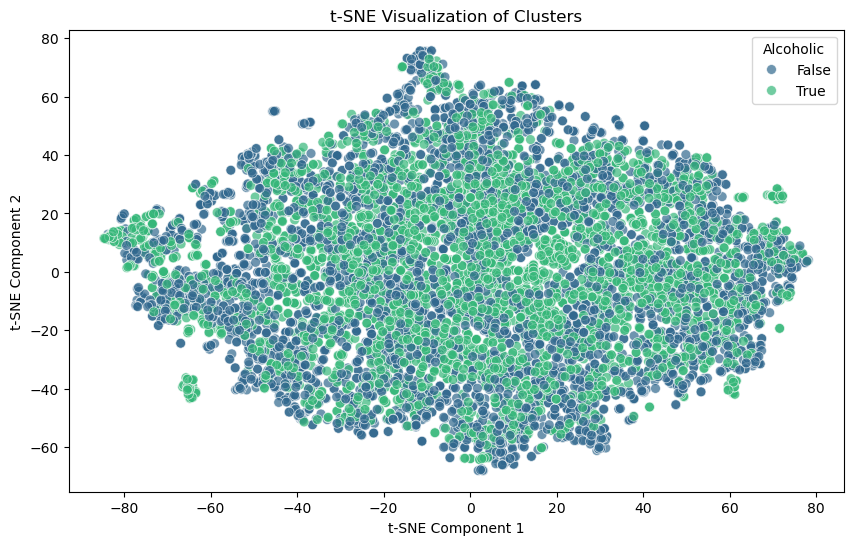

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_sampled, palette='viridis', s=50, alpha=0.7)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Alcoholic')
plt.show()